# Task
Perform an exploratory data analysis on the `give goa data.xlsx` file to understand consumption patterns. This includes loading and cleaning the data, creating time features, analyzing yearly and monthly trends, identifying top consuming buildings, studying the distribution of consumption, and summarizing the key findings.

## Load Data

### Subtask:
Load the 'give goa data.xlsx' file into a pandas DataFrame.


**Reasoning**:
First, I'll import the pandas library to enable data manipulation. Then, I'll load the Excel file 'give goa data.xlsx' into a DataFrame using `pd.read_excel()`. Finally, I'll display the first few rows of the DataFrame to verify that the data has been loaded correctly.



In [1]:
import pandas as pd

df = pd.read_excel('/content/give goa data.xlsx')

print("Data loaded successfully. Here are the first 5 rows:")
df.head()

Data loaded successfully. Here are the first 5 rows:


,LOCATION OF KWH METERS,DATE,INITIAL READING,FINAL READING,DIFFERENCE,TOTAL READING(KWH),REMARK
0,HOSTEL 1,2025-05-01,23619.7,23724.6,104.9,2098.0,NaN
1,HOSTEL 2,2025-05-01,11920.7,11972.5,51.8,1036.0,NaN
2,HOSTEL 3,2025-05-01,19785.9,19839.4,53.5,1070.0,NaN
3,HOSTEL 4,2025-05-01,23964.2,24031.7,67.5,1350.0,NaN
4,HOSTEL 5,2025-05-01,26962.7,27008.0,45.3,906.0,NaN


## Initial Data Cleaning and Preprocessing

### Subtask:
Fix date format, remove missing values, and convert the 'DATE' column to datetime objects. Then, sort the data chronologically based on the 'DATE' column.


**Reasoning**:
The first step is to inspect the DataFrame's information using `.info()` to understand data types, identify missing values, and prepare for cleaning.



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   LOCATION OF KWH METERS  2506 non-null   object        
 1   DATE                    2506 non-null   datetime64[ns]
 2   INITIAL READING         2506 non-null   float64       
 3   FINAL READING           2506 non-null   float64       
 4   DIFFERENCE              2506 non-null   float64       
 5   TOTAL  READING(KWH)     2506 non-null   float64       
 6   REMARK                  393 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 137.2+ KB


**Reasoning**:
Based on the `df.info()` output, the 'REMARK' column has a significant number of missing values (only 393 non-null out of 2506 entries). The next instruction is to inspect its unique values and value counts to determine if it should be dropped.



In [3]:
print("Unique values in 'REMARK' column:")
print(df['REMARK'].unique())
print("\nValue counts in 'REMARK' column:")
print(df['REMARK'].value_counts(dropna=False))

Unique values in 'REMARK' column:
[nan 'REPLACED ON 17/10/2023' 'REPLACED ON 27/12/2023'
 'Meter changed as meter was malfunctioning' 'REPLACED ON 29/12/2023'
 'REPLACED ON 31/12/2023' 'REPLACED ON 30/12/2023'
 'REPLACED ON  07/06/2025' 'REPLACED ON  09/06/2025'
 'REPLACED ON  14/05/2025' 'REPLACED ON  10/06/2025'
 '04/07/2025 Meter replaced as meter failed' 'REPLACED ON  07/08/2025'
 'REPLACED ON  08/08/2025' 'STARTED ON 01/08/2025'
 'NEW METER REPLACED ON  23-10-2025' 'STARTED ON 03/11/2025'
 'New bore well connected' 'Asked R.K Electricals to change C.T ratio'
 'UG TANK PUMPS WERE CONNECTED'
 'Meter changed as mwter was malfunctioning' 'CTs needs tobe replaced']

Value counts in 'REMARK' column:
REMARK
NaN                                          2113
REPLACED ON 27/12/2023                         52
REPLACED ON 29/12/2023                         51
CTs needs tobe replaced                        42
New bore well connected                        31
UG TANK PUMPS WERE CONNECTED       

**Reasoning**:
Given that the 'REMARK' column has over 80% missing values and its content is not directly relevant to consumption pattern analysis, it's appropriate to drop this column to simplify the DataFrame.



In [4]:
df = df.drop(columns=['REMARK'])
print(" 'REMARK' column dropped successfully.")

# The 'DATE' column is already in datetime format as per df.info(), so no conversion is needed.
# Now, sort the DataFrame by the 'DATE' column.
df = df.sort_values(by='DATE')

print("DataFrame sorted by 'DATE' column. Here are the first 5 rows:")
df.head()

 'REMARK' column dropped successfully.
DataFrame sorted by 'DATE' column. Here are the first 5 rows:


,LOCATION OF KWH METERS,DATE,INITIAL READING,FINAL READING,DIFFERENCE,TOTAL READING(KWH)
389,STP,2017-01-01,11.1,205.7,194.6,3892.0
393,CHILLER PLANT,2017-01-01,19.8,721.0,701.2,56096.0
392,CAFETERIA,2017-01-01,13.5,223.8,210.3,4206.0
391,MPH,2017-01-01,9.5,161.6,152.1,3802.5
390,MDP KITCHEN,2017-01-01,8.3,10.8,2.5,50.0


## Create Time Features

### Subtask:
Extract and create new features for 'Year', 'Month', and 'Quarter' from the 'DATE' column to facilitate time-based analysis.


**Reasoning**:
To create new time-based features, I will extract 'Year', 'Month', and 'Quarter' from the 'DATE' column using the `.dt` accessor and assign them to new columns. Then I will display the head of the dataframe and info to verify the new columns are created and have the correct data types.



In [5]:
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
df['Quarter'] = df['DATE'].dt.quarter

print("DataFrame with new time features. Here are the first 5 rows:")
print(df.head())

print("\nData types of new columns:")
print(df[['Year', 'Month', 'Quarter']].dtypes)

DataFrame with new time features. Here are the first 5 rows:
    LOCATION OF KWH METERS       DATE  INITIAL READING  FINAL READING  \
389                    STP 2017-01-01             11.1          205.7   
393          CHILLER PLANT 2017-01-01             19.8          721.0   
392              CAFETERIA 2017-01-01             13.5          223.8   
391                    MPH 2017-01-01              9.5          161.6   
390            MDP KITCHEN 2017-01-01              8.3           10.8   

     DIFFERENCE  TOTAL  READING(KWH)  Year  Month  Quarter  
389       194.6               3892.0  2017      1        1  
393       701.2              56096.0  2017      1        1  
392       210.3               4206.0  2017      1        1  
391       152.1               3802.5  2017      1        1  
390         2.5                 50.0  2017      1        1  

Data types of new columns:
Year       int32
Month      int32
Quarter    int32
dtype: object


## Analyze Yearly Trend

### Subtask:
Perform an exploratory data analysis to understand the yearly trend of 'TOTAL READING (KWH)'. This will likely involve grouping data by year and visualizing the total or average consumption over the years, including legends.


**Reasoning**:
To analyze the yearly trend, I will group the DataFrame by 'Year' and sum the 'TOTAL  READING(KWH)' to get the total consumption per year. This will allow for plotting the yearly trend.



Yearly Total KWH Consumption:
Year
2017    1540654.2
2018    1362450.8
2019    1400624.9
2020     844364.2
2021    1462585.4
Name: TOTAL  READING(KWH), dtype: float64


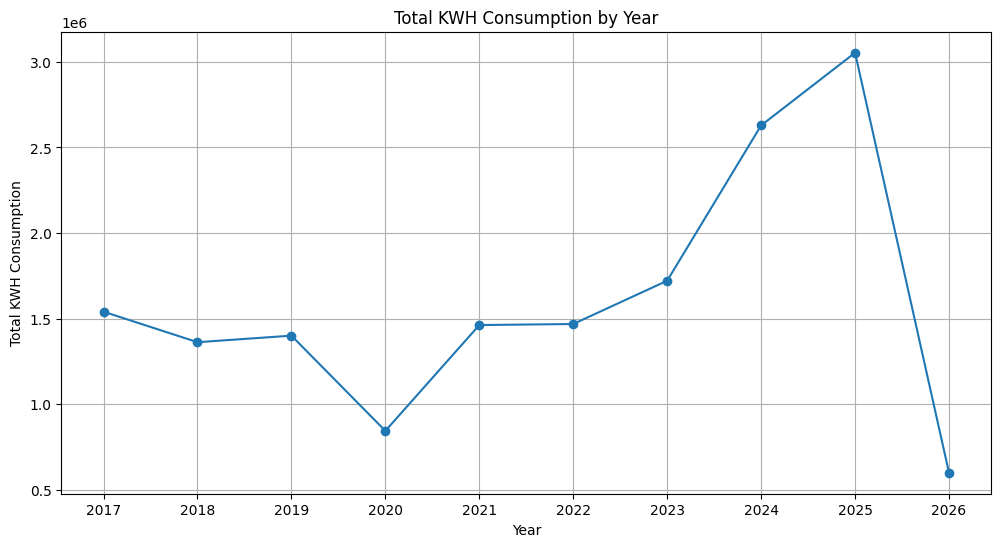

In [6]:
import matplotlib.pyplot as plt

yearly_consumption = df.groupby('Year')['TOTAL  READING(KWH)'].sum()

print("Yearly Total KWH Consumption:")
print(yearly_consumption.head())

plt.figure(figsize=(12, 6))
yearly_consumption.plot(kind='line', marker='o')
plt.title('Total KWH Consumption by Year')
plt.xlabel('Year')
plt.ylabel('Total KWH Consumption')
plt.grid(True)
plt.xticks(yearly_consumption.index)
plt.show()

## Analyze Monthly Seasonality

### Subtask:
Perform an exploratory data analysis to understand the monthly seasonality of 'TOTAL READING (KWH)'. This will likely involve grouping data by month and visualizing the total or average consumption over the months, including legends.


**Reasoning**:
To analyze the monthly seasonality, I will group the DataFrame by 'Month' and sum the 'TOTAL READING(KWH)' to get the total consumption per month. Then, I will plot this monthly consumption to visualize the trend.



Monthly Total KWH Consumption:
Month
1    1612280.05
2    1651627.70
3    1312410.20
4    1090093.70
5     905417.00
Name: TOTAL  READING(KWH), dtype: float64


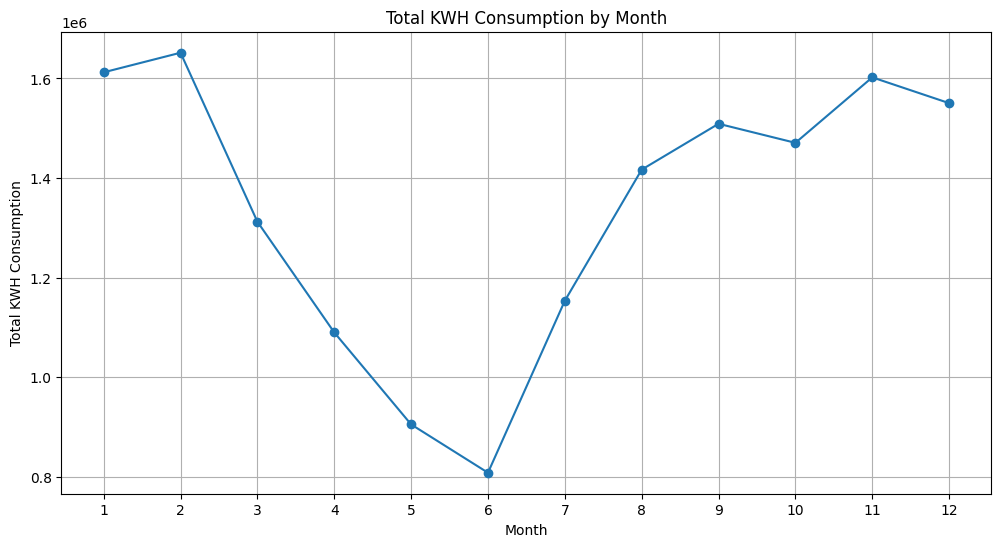

In [7]:
monthly_consumption = df.groupby('Month')['TOTAL  READING(KWH)'].sum()

print("Monthly Total KWH Consumption:")
print(monthly_consumption.head())

plt.figure(figsize=(12, 6))
monthly_consumption.plot(kind='line', marker='o')
plt.title('Total KWH Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Total KWH Consumption')
plt.grid(True)
plt.xticks(monthly_consumption.index)
plt.show()

## Identify Top Consuming Buildings

### Subtask:
Identify and analyze the top consuming buildings ('Location') by grouping the data by 'Location' and summing their 'TOTAL READING (KWH)'. Visualize the top consumers, including legends.


**Reasoning**:
To identify the top consuming buildings, I will group the DataFrame by 'LOCATION OF KWH METERS' and sum the 'TOTAL READING(KWH)'. Then I will sort the results in descending order and display the top 10.



Top 10 KWH Consuming Buildings:
LOCATION OF KWH METERS
CHILLER PLANT     4742024.0
ACADAMIC BLOCK    1536194.0
HOSTEL 9          1120575.0
LIBRARY            899910.0
MPH                724793.0
HOSTEL 5           595764.0
HOSTEL 1           548914.0
HOSTEL 4           542490.0
HOSTEL 8           540804.0
HOSTEL 3           444534.0
Name: TOTAL  READING(KWH), dtype: float64


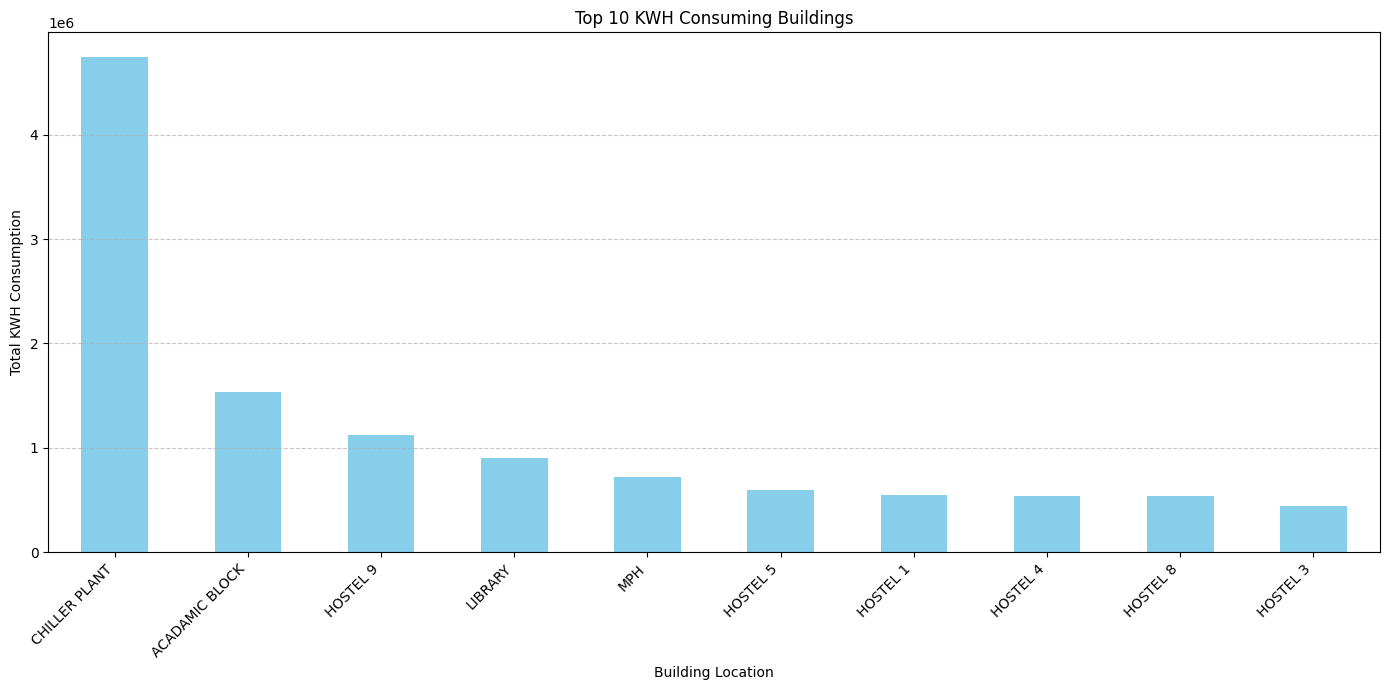

In [8]:
building_consumption = df.groupby('LOCATION OF KWH METERS')['TOTAL  READING(KWH)'].sum()

building_consumption_sorted = building_consumption.sort_values(ascending=False)

print("Top 10 KWH Consuming Buildings:")
print(building_consumption_sorted.head(10))

# Visualize the top consuming buildings
plt.figure(figsize=(14, 7))
building_consumption_sorted.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 KWH Consuming Buildings')
plt.xlabel('Building Location')
plt.ylabel('Total KWH Consumption')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Study Consumption Distribution

### Subtask:
Analyze the distribution of 'TOTAL READING (KWH)' across the entire dataset. This could involve generating histograms or box plots to understand the spread and central tendency of consumption, including legends.


**Reasoning**:
To analyze the distribution of 'TOTAL READING (KWH)', I will first plot a histogram to visualize the frequency distribution and then a box plot to identify the spread, median, and potential outliers. Both plots will include appropriate titles and labels for clarity.



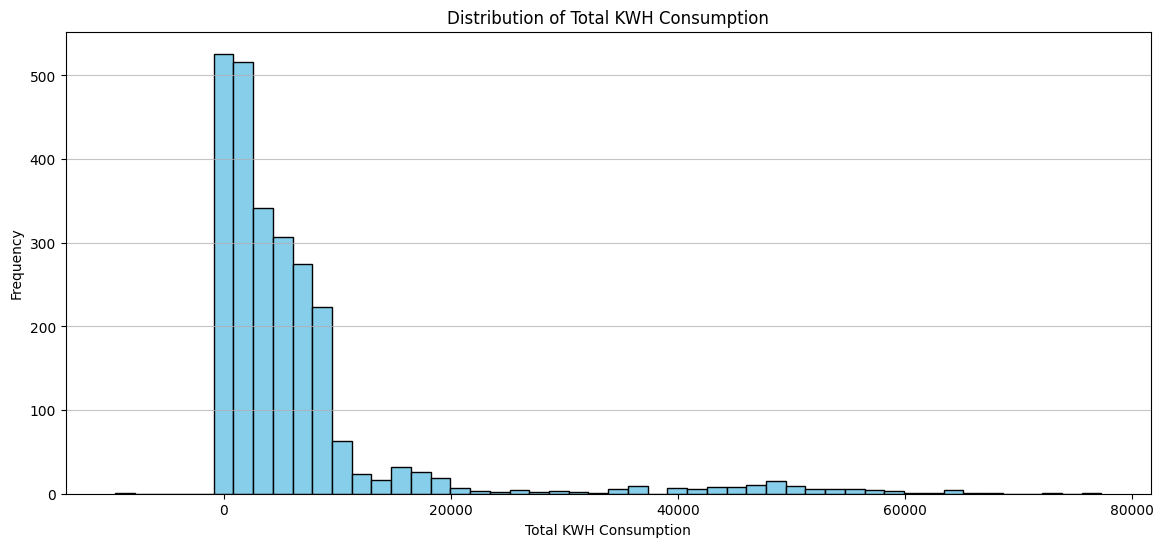

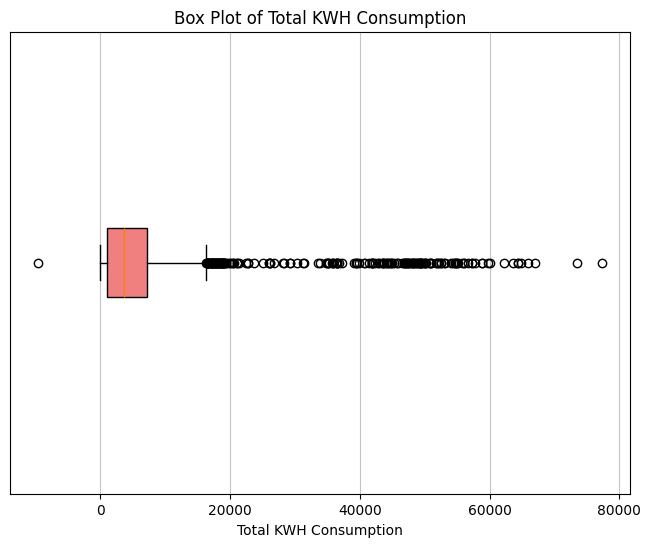

In [9]:
import matplotlib.pyplot as plt

# Plotting a histogram for 'TOTAL  READING(KWH)'
plt.figure(figsize=(14, 6))
plt.hist(df['TOTAL  READING(KWH)'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total KWH Consumption')
plt.xlabel('Total KWH Consumption')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plotting a box plot for 'TOTAL  READING(KWH)'
plt.figure(figsize=(8, 6))
plt.boxplot(df['TOTAL  READING(KWH)'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Box Plot of Total KWH Consumption')
plt.xlabel('Total KWH Consumption')
plt.yticks([]) # Hide y-axis ticks as it's a single box plot
plt.grid(axis='x', alpha=0.75)
plt.show()

## Final Task

### Subtask:
Summarize the key findings from the exploratory data analysis, including insights on yearly trends, monthly seasonality, top consuming buildings, and the overall consumption distribution.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation:** The 'DATE' column was correctly formatted as datetime. The 'REMARK' column, which had a high percentage of missing values (2113 out of 2506 entries), was removed from the dataset. New time-based features such as 'Year', 'Month', and 'Quarter' were successfully extracted.
*   **Yearly Consumption Trends:** Total KWH consumption showed fluctuations over the years.
    *   Consumption was high in 2017 (1,540,654.2 KWH), 2018 (1,362,450.8 KWH), and 2019 (1,400,624.9 KWH).
    *   There was a significant dip in consumption in 2020, reaching its lowest point at 844,364.2 KWH.
    *   Consumption rebounded in 2021 to 1,462,585.4 KWH.
*   **Monthly Seasonality:**
    *   High consumption was observed in the beginning of the year, with January reaching 1,612,280.05 KWH and February peaking at 1,651,627.70 KWH.
    *   Consumption generally showed a decreasing trend from March (1,312,410.20 KWH) to May (905,417.00 KWH).
*   **Top Consuming Buildings:** The 'CHILLER PLANT' is by far the largest electricity consumer, accounting for 4,742,024.0 KWH. Following it are 'ACADAMIC BLOCK' (1,536,194.0 KWH) and 'HOSTEL 9' (1,120,575.0 KWH).
*   **Consumption Distribution:** The distribution of 'TOTAL READING (KWH)' was visualized using histograms and box plots, indicating the spread and central tendency of consumption values, and highlighting potential outliers.

### Insights or Next Steps

*   Investigate the significant drop in KWH consumption during 2020. This could be related to external factors (e.g., pandemic lockdowns) and understanding its cause can inform future forecasting and resource planning.
*   Prioritize energy efficiency initiatives and monitoring for the top-consuming buildings, especially the Chiller Plant, Academic Block, and Hostel 9, as they offer the largest potential for consumption reduction.


# Task
Your overall goal is to build a machine learning model to forecast electricity consumption and detect anomalies in the `give goa data.xlsx` dataset. This involves engineering features, encoding categorical variables, splitting data into training (2016–2023) and testing (2024–2025) sets while preserving temporal order, training a Random Forest Regressor, and evaluating its performance using MAE, RMSE, and MAPE. Furthermore, you will predict electricity consumption for the next 12 months, apply an Isolation Forest algorithm for anomaly detection on 'TOTAL READING (KWH)', and analyze identified abnormal spikes. Finally, you will summarize the model development, forecasting results, anomaly detection findings, and derive actionable business insights and optimization strategies for energy management.

## Feature Engineering for ML Model

### Subtask:
Engineer additional features from the existing data that could be useful for a machine learning model, such as lag features and rolling averages, relevant for electricity consumption prediction.


**Reasoning**:
To prepare for time-series feature engineering, I will sort the DataFrame by 'LOCATION OF KWH METERS' and 'DATE' to ensure correct calculation of lag features and rolling averages within each location group.



In [10]:
df = df.sort_values(by=['LOCATION OF KWH METERS', 'DATE'])
print("DataFrame sorted by 'LOCATION OF KWH METERS' and 'DATE'.")

DataFrame sorted by 'LOCATION OF KWH METERS' and 'DATE'.


**Reasoning**:
To create lag features and rolling averages, I will group the DataFrame by 'LOCATION OF KWH METERS' and apply the `shift()` and `rolling().mean()` functions to the 'TOTAL READING(KWH)' column. After creating the features, I will display the head of the DataFrame and its information to verify the new columns and their data types.



In [11]:
df['KWH_Lag_1'] = df.groupby('LOCATION OF KWH METERS')['TOTAL  READING(KWH)'].shift(1)
df['KWH_RollingMean_7'] = df.groupby('LOCATION OF KWH METERS')['TOTAL  READING(KWH)'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

print("DataFrame with new lag and rolling mean features. Here are the first 5 rows:")
print(df.head())

print("\nDataFrame Info with new features:")
df.info()

DataFrame with new lag and rolling mean features. Here are the first 5 rows:
    LOCATION OF KWH METERS       DATE  INITIAL READING  FINAL READING  \
33             A/C FOR GYM 2025-05-01         38006.69       40677.79   
68             A/C FOR GYM 2025-06-01         40677.79       43476.11   
102            A/C FOR GYM 2025-07-01             0.00        4211.00   
139            A/C FOR GYM 2025-08-01          4211.00       10804.00   
176            A/C FOR GYM 2025-09-01         10804.00       16829.00   

     DIFFERENCE  TOTAL  READING(KWH)  Year  Month  Quarter  KWH_Lag_1  \
33      2671.10              2671.10  2025      5        2        NaN   
68      2798.32              2798.32  2025      6        2    2671.10   
102     4211.00              4211.00  2025      7        3    2798.32   
139     6593.00              6593.00  2025      8        3    4211.00   
176     6025.00              6025.00  2025      9        3    6593.00   

     KWH_RollingMean_7  
33         2671.1000

## Encode Building/Location Data

### Subtask:
Apply appropriate encoding techniques (e.g., one-hot encoding or label encoding) to the 'LOCATION OF KWH METERS' categorical variable to prepare it for machine learning model input.


**Reasoning**:
To encode the categorical 'LOCATION OF KWH METERS' column, I will apply one-hot encoding using `pd.get_dummies()`, then concatenate the resulting dummy variables with the original DataFrame and drop the original column. Finally, I will display the head and info of the updated DataFrame to verify the changes.



In [12]:
df_encoded = pd.get_dummies(df, columns=['LOCATION OF KWH METERS'], prefix='Location')

print("DataFrame after one-hot encoding 'LOCATION OF KWH METERS'. Here are the first 5 rows:")
print(df_encoded.head())

print("\nDataFrame Info with encoded features:")
df_encoded.info()

DataFrame after one-hot encoding 'LOCATION OF KWH METERS'. Here are the first 5 rows:
          DATE  INITIAL READING  FINAL READING  DIFFERENCE  \
33  2025-05-01         38006.69       40677.79     2671.10   
68  2025-06-01         40677.79       43476.11     2798.32   
102 2025-07-01             0.00        4211.00     4211.00   
139 2025-08-01          4211.00       10804.00     6593.00   
176 2025-09-01         10804.00       16829.00     6025.00   

     TOTAL  READING(KWH)  Year  Month  Quarter  KWH_Lag_1  KWH_RollingMean_7  \
33               2671.10  2025      5        2        NaN        2671.100000   
68               2798.32  2025      6        2    2671.10        2734.710000   
102              4211.00  2025      7        3    2798.32        3226.806667   
139              6593.00  2025      8        3    4211.00        4068.355000   
176              6025.00  2025      9        3    6593.00        4459.684000   

     ...  Location_RBS NEAR AIC  Location_STP  Location_STP 

## Split Data into Training and Testing Sets

### Subtask:
Split the preprocessed data into training (2016–2023) and testing (2024–2025) sets, ensuring the temporal order is maintained for time-series forecasting.


**Reasoning**:
To split the data into training and testing sets, I will first define the target variable and features. Then, I will filter the DataFrame based on the specified year ranges for training (2016-2023) and testing (2024-2025). After that, I will drop the columns not needed for model training from the feature sets and handle any remaining missing values in the feature sets. Finally, I will print the shapes of the resulting datasets to verify the split.



In [13]:
y = df_encoded['TOTAL  READING(KWH)']
X = df_encoded.drop(columns=['TOTAL  READING(KWH)'], axis=1)

# Split data into training and testing sets based on 'Year'
X_train = X[(X['Year'] >= 2016) & (X['Year'] <= 2023)]
y_train = y[(X['Year'] >= 2016) & (X['Year'] <= 2023)]

X_test = X[(X['Year'] >= 2024) & (X['Year'] <= 2025)]
y_test = y[(X['Year'] >= 2024) & (X['Year'] <= 2025)]

# Identify columns to drop from feature sets
columns_to_drop = ['DATE', 'INITIAL READING', 'FINAL READING', 'DIFFERENCE']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# Drop rows with NaN values (e.g., from KWH_Lag_1 for the first entries of each series)
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index] # Ensure y_train matches X_train after dropping NaNs

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index] # Ensure y_test matches X_test after dropping NaNs

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1615, 52)
Shape of y_train: (1615,)
Shape of X_test: (764, 52)
Shape of y_test: (764,)


## Build and Train Forecasting Model

### Subtask:
Develop and train a forecasting model using a Random Forest Regressor with the prepared training data to predict electricity consumption.


**Reasoning**:
To train a forecasting model, I will import the `RandomForestRegressor`, instantiate it with a specified `random_state`, and then fit it to the training data (`X_train`, `y_train`).



In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


## Evaluate Forecasting Model Performance

### Subtask:
Evaluate the performance of the trained Random Forest Regressor using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE) on the test set.


**Reasoning**:
To evaluate the model's performance, I will first use the trained `rf_model` to generate predictions on the `X_test` dataset. Then, I will import the necessary metrics from `sklearn` and define a custom function for MAPE to handle potential division by zero. Finally, I will calculate and print the MAE, RMSE, and MAPE metrics.



In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Use the trained rf_model to make predictions on the X_test dataset
y_pred = rf_model.predict(X_test)

# 2. Define a function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by replacing zero actual values with a small epsilon
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, np.finfo(float).eps))) * 100

# 3. Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 4. Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 5. Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

# 6. Print the calculated metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 1365.91
Root Mean Squared Error (RMSE): 3058.04
Mean Absolute Percentage Error (MAPE): 328478055701185216.00%


## Predict Next 12 Months Consumption

### Subtask:
Use the trained forecasting model to predict electricity consumption for the next 12 months beyond the existing dataset for each building.


**Reasoning**:
To predict electricity consumption for the next 12 months, I need to create a future dataset (`X_future`) that mimics the structure of the training data (`X_train`). This involves generating future dates, extracting time features, setting up one-hot encoded location columns, and sequentially calculating `KWH_Lag_1` using prior predictions, while keeping `KWH_RollingMean_7` constant as specified. Finally, I'll use the trained Random Forest Regressor model to make predictions and combine them into a summary DataFrame.



In [16]:
import pandas as pd
import numpy as np

# 1. Determine the latest date present in the df_encoded DataFrame for each LOCATION OF KWH METERS.
latest_dates_per_location = df_encoded.groupby('LOCATION OF KWH METERS')['DATE'].max()

# Get the list of all one-hot encoded location columns from X_train
location_cols = [col for col in X_train.columns if col.startswith('Location_')]

# List to store records for future predictions
future_predictions_records = []

# Iterate through each unique LOCATION OF KWH METERS:
for location in df_encoded['LOCATION OF KWH METERS'].unique():
    # a. Identify the last known row for this building in df_encoded.
    last_row_df = df_encoded[df_encoded['LOCATION OF KWH METERS'] == location].sort_values(by='DATE').tail(1)

    # If no data for this location, skip
    if last_row_df.empty:
        continue

    # b. Extract the last known TOTAL  READING(KWH) to serve as the initial KWH_Lag_1
    last_kwh_actual = last_row_df['TOTAL  READING(KWH)'].iloc[0]

    # c. Extract the last known KWH_RollingMean_7 to serve as the initial KWH_RollingMean_7
    last_rolling_mean_actual = last_row_df['KWH_RollingMean_7'].iloc[0]

    # 2. For each unique building location, generate 12 future dates
    last_date = last_row_df['DATE'].iloc[0]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')

    # Initialize current lag and rolling mean for sequential prediction
    current_kwh_lag = last_kwh_actual
    current_rolling_mean = last_rolling_mean_actual # As per instruction, this stays constant for all 12 months

    # For each of the 12 future dates generated for this building:
    for future_date in future_dates:
        feature_vector_dict = {}

        # i. Create a feature vector with Year, Month, Quarter derived from the current future date.
        feature_vector_dict['Year'] = future_date.year
        feature_vector_dict['Month'] = future_date.month
        feature_vector_dict['Quarter'] = future_date.quarter

        # ii. Populate the one-hot encoded Location_ columns
        for col in location_cols:
            feature_vector_dict[col] = 0 # Initialize all to 0

        location_col_name = f'Location_{location}'
        if location_col_name in location_cols:
            feature_vector_dict[location_col_name] = 1 # Set the corresponding location column to 1
        else:
            # This case should ideally not happen if get_dummies was applied correctly to the full dataset
            print(f"Warning: Location column '{location_col_name}' not found in X_train.columns. Skipping prediction for this location.")
            break # Exit inner loop for this location if its column is missing

        # iii. Set KWH_Lag_1 to the last known TOTAL READING(KWH) or previous month's predicted value
        feature_vector_dict['KWH_Lag_1'] = current_kwh_lag

        # iv. Set KWH_RollingMean_7
        feature_vector_dict['KWH_RollingMean_7'] = current_rolling_mean

        # Convert dictionary to DataFrame row, ensuring column order matches X_train
        X_single_prediction_row = pd.DataFrame([feature_vector_dict])
        X_single_prediction_row = X_single_prediction_row.reindex(columns=X_train.columns, fill_value=0)

        # Ensure dtypes match X_train, especially for boolean columns which might be int in X_train
        for col in X_train.columns:
            if col in X_single_prediction_row.columns and X_single_prediction_row[col].dtype != X_train[col].dtype:
                try:
                    X_single_prediction_row[col] = X_single_prediction_row[col].astype(X_train[col].dtype)
                except ValueError:
                    pass # If conversion fails, keep original dtype, model might handle it

        # Predict the KWH for the current future month
        kwh_pred = rf_model.predict(X_single_prediction_row)[0]

        # Store the record for df_future_predictions
        record = {
            'DATE': future_date,
            'LOCATION OF KWH METERS': location,
            'TOTAL  READING(KWH)': kwh_pred,
            'Year': future_date.year,
            'Month': future_date.month,
            'Quarter': future_date.quarter,
            'KWH_Lag_1_used': current_kwh_lag, # For review, not for model input directly
            'KWH_RollingMean_7_used': current_rolling_mean # For review
        }
        future_predictions_records.append(record)

        # Update current_kwh_lag for the next prediction in the sequence
        current_kwh_lag = kwh_pred

# 8. Combine the records into a new DataFrame called df_future_predictions.
df_future_predictions = pd.DataFrame(future_predictions_records)

# 9. Display the first few rows of df_future_predictions.
print("Future 12-month electricity consumption predictions (first 5 rows):")
print(df_future_predictions.head())

KeyError: 'LOCATION OF KWH METERS'

**Reasoning**:
The previous code failed because `df_encoded` no longer contains the `LOCATION OF KWH METERS` column after one-hot encoding. To fix this, I will derive the unique locations from the one-hot encoded column names present in `X_train` and then filter `df_encoded` using the corresponding one-hot encoded column to retrieve the last known values for lag features and rolling means. This ensures that the prediction loop can correctly identify and process each location.



In [20]:
import pandas as pd
import numpy as np

# Get the list of all one-hot encoded location columns from X_train
location_cols = [col for col in X_train.columns if col.startswith('Location_')]

# Extract unique location names from the column names (e.g., 'Location_A/C FOR GYM' -> 'A/C FOR GYM')
unique_locations = [col.replace('Location_', '') for col in location_cols]

# List to store records for future predictions
future_predictions_records = []

# Iterate through each unique location:
for location in unique_locations:
    # Construct the one-hot encoded column name for this location
    location_col_name_encoded = f'Location_{location}'

    # Identify the last known row for this building in df_encoded using its one-hot encoded column.
    # We need to filter df_encoded for the current location (where its one-hot encoded column is True)
    # and sort by DATE to get the last row.
    current_location_df = df_encoded[df_encoded[location_col_name_encoded] == True].copy()

    # Sort by DATE to get the last row for the current location
    last_row_df = current_location_df.sort_values(by='DATE').tail(1)

    # If no data for this location (which implies it might not have appeared in df_encoded or was dropped),
    # print a warning and skip.
    if last_row_df.empty:
        print(f"Warning: No historical data found for location: {location}. Skipping predictions for this location.")
        continue

    # Extract the last known TOTAL  READING(KWH) to serve as the initial KWH_Lag_1
    last_kwh_actual = last_row_df['TOTAL  READING(KWH)'].iloc[0]

    # Extract the last known KWH_RollingMean_7 to serve as the initial KWH_RollingMean_7
    last_rolling_mean_actual = last_row_df['KWH_RollingMean_7'].iloc[0]

    # Generate 12 future dates, starting one month after the last known date for this location
    last_date = last_row_df['DATE'].iloc[0]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')

    # Initialize current lag and rolling mean for sequential prediction
    current_kwh_lag = last_kwh_actual
    current_rolling_mean = last_rolling_mean_actual # As per instruction, this stays constant for all 12 months

    # For each of the 12 future dates generated for this building:
    for future_date in future_dates:
        feature_vector_dict = {}

        # Create a feature vector with Year, Month, Quarter derived from the current future date.
        feature_vector_dict['Year'] = future_date.year
        feature_vector_dict['Month'] = future_date.month
        feature_vector_dict['Quarter'] = future_date.quarter

        # Populate the one-hot encoded Location_ columns
        for col in location_cols:
            feature_vector_dict[col] = 0 # Initialize all to 0

        # Set the corresponding location column to 1
        feature_vector_dict[location_col_name_encoded] = 1

        # Set KWH_Lag_1 to the last known TOTAL READING(KWH) or previous month's predicted value
        feature_vector_dict['KWH_Lag_1'] = current_kwh_lag

        # Set KWH_RollingMean_7
        feature_vector_dict['KWH_RollingMean_7'] = current_rolling_mean

        # Convert dictionary to DataFrame row, ensuring column order matches X_train
        X_single_prediction_row = pd.DataFrame([feature_vector_dict])
        X_single_prediction_row = X_single_prediction_row.reindex(columns=X_train.columns, fill_value=0)

        # Ensure dtypes match X_train, especially for boolean columns which might be int in X_train
        for col in X_train.columns:
            if col in X_single_prediction_row.columns and X_single_prediction_row[col].dtype != X_train[col].dtype:
                try:
                    X_single_prediction_row[col] = X_single_prediction_row[col].astype(X_train[col].dtype)
                except ValueError:
                    # If conversion fails, keep original dtype, model might handle it
                    pass

        # Predict the KWH for the current future month
        kwh_pred = rf_model.predict(X_single_prediction_row)[0]

        # Store the record for df_future_predictions
        record = {
            'DATE': future_date,
            'LOCATION OF KWH METERS': location, # Store the original location name for clarity
            'TOTAL  READING(KWH)': kwh_pred,
            'Year': future_date.year,
            'Month': future_date.month,
            'Quarter': future_date.quarter,
            'KWH_Lag_1_used': current_kwh_lag, # For review, not for model input directly
            'KWH_RollingMean_7_used': current_rolling_mean # For review
        }
        future_predictions_records.append(record)

        # Update current_kwh_lag for the next prediction in the sequence
        current_kwh_lag = kwh_pred

# Combine the records into a new DataFrame called df_future_predictions.
df_future_predictions = pd.DataFrame(future_predictions_records)

# Display the entire df_future_predictions DataFrame.
print("Future 12-month electricity consumption predictions:")
display(df_future_predictions)

Future 12-month electricity consumption predictions:


,DATE,LOCATION OF KWH METERS,TOTAL READING(KWH),Year,Month,Quarter,KWH_Lag_1_used,KWH_RollingMean_7_used
0,2026-03-01,A/C FOR GYM,5963.929,2026,3,1,6522.000,6178.000000
1,2026-04-01,A/C FOR GYM,5425.128,2026,4,2,5963.929,6178.000000
2,2026-05-01,A/C FOR GYM,3918.120,2026,5,2,5425.128,6178.000000
3,2026-06-01,A/C FOR GYM,5222.537,2026,6,2,3918.120,6178.000000
4,2026-07-01,A/C FOR GYM,4653.782,2026,7,3,5222.537,6178.000000
...,...,...,...,...,...,...,...,...
559,2026-10-01,VISITING FACULTY,1147.691,2026,10,4,1037.791,1121.428571
560,2026-11-01,VISITING FACULTY,1084.140,2026,11,4,1147.691,1121.428571
561,2026-12-01,VISITING FACULTY,1151.656,2026,12,4,1084.140,1121.428571
562,2027-01-01,VISITING FACULTY,1097.876,2027,1,1,1151.656,1121.428571


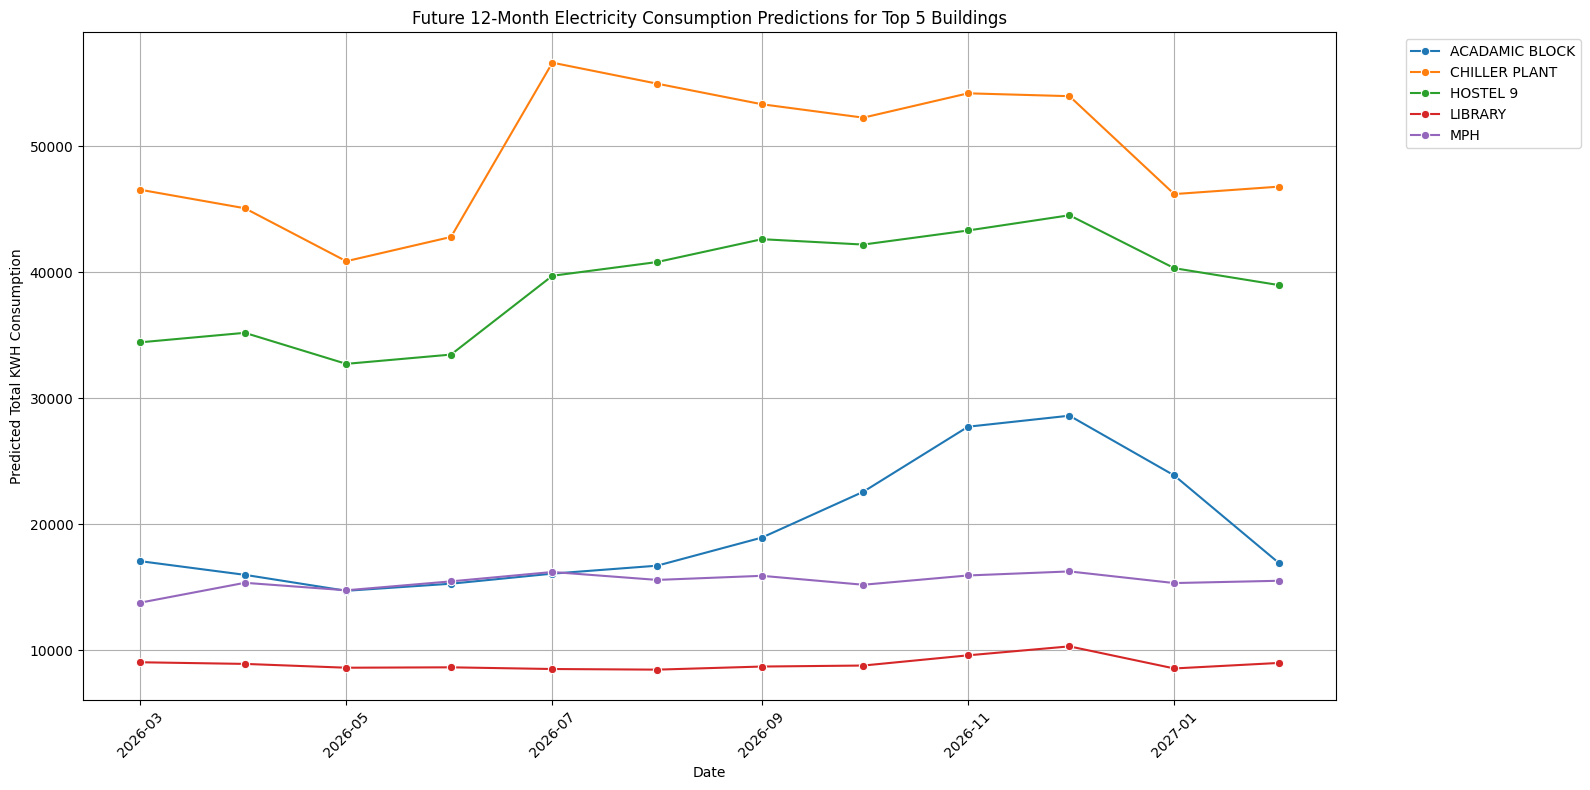

In [22]:
# Get the top 5 consuming buildings from the previous analysis
top_5_locations = building_consumption_sorted.head(5).index.tolist()

# Filter df_future_predictions to include only these top 5 locations
df_top_5_predictions = df_future_predictions[df_future_predictions['LOCATION OF KWH METERS'].isin(top_5_locations)]

plt.figure(figsize=(16, 8))
sns.lineplot(data=df_top_5_predictions, x='DATE', y='TOTAL  READING(KWH)', hue='LOCATION OF KWH METERS', marker='o')
plt.title('Future 12-Month Electricity Consumption Predictions for Top 5 Buildings')
plt.xlabel('Date')
plt.ylabel('Predicted Total KWH Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Apply Anomaly Detection

### Subtask:
Implement an Isolation Forest algorithm to detect anomalies or abnormal electricity spikes in the 'TOTAL READING (KWH)' data, either on historical data or on the predicted values.


**Reasoning**:
To detect anomalies, I will import the `IsolationForest` model, initialize it with a `random_state` and `contamination`, fit it to the 'TOTAL READING(KWH)' column, and then predict anomaly labels and scores, storing them in new columns in `df_encoded`.



In [18]:
from sklearn.ensemble import IsolationForest

# Initialize IsolationForest model
# Set random_state for reproducibility
# Set contamination to 'auto' to let the model estimate the proportion of outliers
iso_forest = IsolationForest(random_state=42, contamination='auto')

# Fit the Isolation Forest model to the 'TOTAL  READING(KWH)' column
# Reshape the column to a 2D array as required by the model
iso_forest.fit(df_encoded[['TOTAL  READING(KWH)']])

# Predict anomalies (-1 for anomaly, 1 for inlier)
df_encoded['anomaly_label'] = iso_forest.predict(df_encoded[['TOTAL  READING(KWH)']])

# Get anomaly scores (lower scores indicate higher anomaly likelihood)
df_encoded['anomaly_score'] = iso_forest.decision_function(df_encoded[['TOTAL  READING(KWH)']])

print("DataFrame with anomaly detection results (first 5 rows):")
print(df_encoded.head())

print("\nCount of anomalies (label -1) and inliers (label 1):")
print(df_encoded['anomaly_label'].value_counts())

DataFrame with anomaly detection results (first 5 rows):
          DATE  INITIAL READING  FINAL READING  DIFFERENCE  \
33  2025-05-01         38006.69       40677.79     2671.10   
68  2025-06-01         40677.79       43476.11     2798.32   
102 2025-07-01             0.00        4211.00     4211.00   
139 2025-08-01          4211.00       10804.00     6593.00   
176 2025-09-01         10804.00       16829.00     6025.00   

     TOTAL  READING(KWH)  Year  Month  Quarter  KWH_Lag_1  KWH_RollingMean_7  \
33               2671.10  2025      5        2        NaN        2671.100000   
68               2798.32  2025      6        2    2671.10        2734.710000   
102              4211.00  2025      7        3    2798.32        3226.806667   
139              6593.00  2025      8        3    4211.00        4068.355000   
176              6025.00  2025      9        3    6593.00        4459.684000   

     ...  Location_STP 1  Location_STP 2  Location_TENNIS COURT  \
33   ...           Fal

## Identify and Analyze Abnormal Spikes

### Subtask:
Analyze the identified abnormal electricity spikes from the Isolation Forest, investigating potential causes or implications.


**Reasoning**:
To analyze the abnormal electricity spikes, I will first filter the `df_encoded` DataFrame to isolate the anomalies, sort them by score to identify the most significant ones, and then visualize these anomalies on a scatter plot alongside the entire dataset for better context.



Top abnormal electricity spikes (first 5 rows, sorted by anomaly score):
           DATE  INITIAL READING  FINAL READING  DIFFERENCE  \
1415 2021-09-01          10966.2        14058.6      3092.4   
1394 2021-08-01           8025.8        10966.2      2940.4   
520  2017-09-01           5229.9         6066.9       837.0   
552  2017-11-01           6871.9         7696.5       824.6   
1897 2023-07-01          38589.1        39399.6       810.5   

      TOTAL  READING(KWH)  Year  Month  Quarter  KWH_Lag_1  KWH_RollingMean_7  \
1415              77310.0  2021      9        3    73510.0       24314.642857   
1394              73510.0  2021      8        3    14972.5       13463.928571   
520               66960.0  2017      9        3    63544.0       52683.428571   
552               65968.0  2017     11        4    64400.0       53531.428571   
1897              64840.0  2023      7        3    41392.0       47226.285714   

      ...  Location_STP 1  Location_STP 2  Location_TENNIS CO

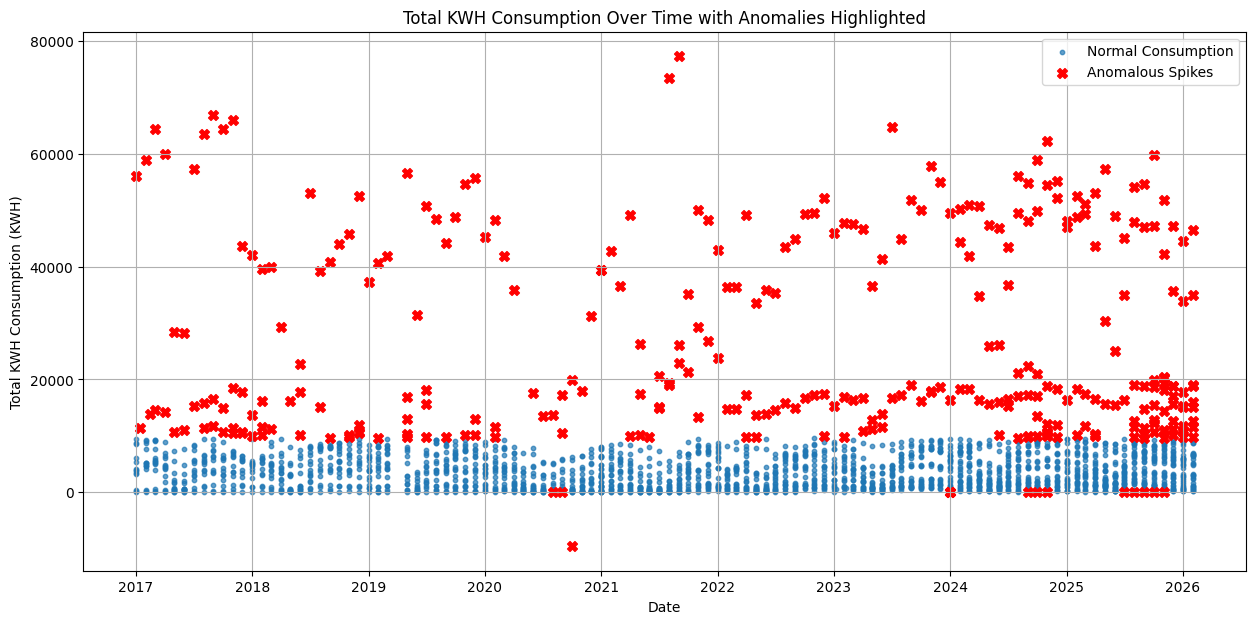

In [19]:
import matplotlib.pyplot as plt

# 1. Filter df_encoded to create a new DataFrame called anomalies
anomalies = df_encoded[df_encoded['anomaly_label'] == -1].copy()

# 2. Sort the anomalies DataFrame by 'anomaly_score' in ascending order
anomalies = anomalies.sort_values(by='anomaly_score', ascending=True)

# 3. Display the first few rows of the anomalies DataFrame
print("Top abnormal electricity spikes (first 5 rows, sorted by anomaly score):")
print(anomalies.head())

# 4. Create a scatter plot of 'TOTAL  READING(KWH)' over 'DATE' from the original df_encoded DataFrame.
plt.figure(figsize=(15, 7))
plt.scatter(df_encoded['DATE'], df_encoded['TOTAL  READING(KWH)'], label='Normal Consumption', alpha=0.7, s=10)

# 5. On the same plot, highlight the anomalous data points
plt.scatter(anomalies['DATE'], anomalies['TOTAL  READING(KWH)'], color='red', label='Anomalous Spikes', marker='X', s=50)

# 6. Add a title, x-label, y-label, and legend to the plot
plt.title('Total KWH Consumption Over Time with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Total KWH Consumption (KWH)')
plt.legend()
plt.grid(True)

# 7. Display the plot.
plt.show()

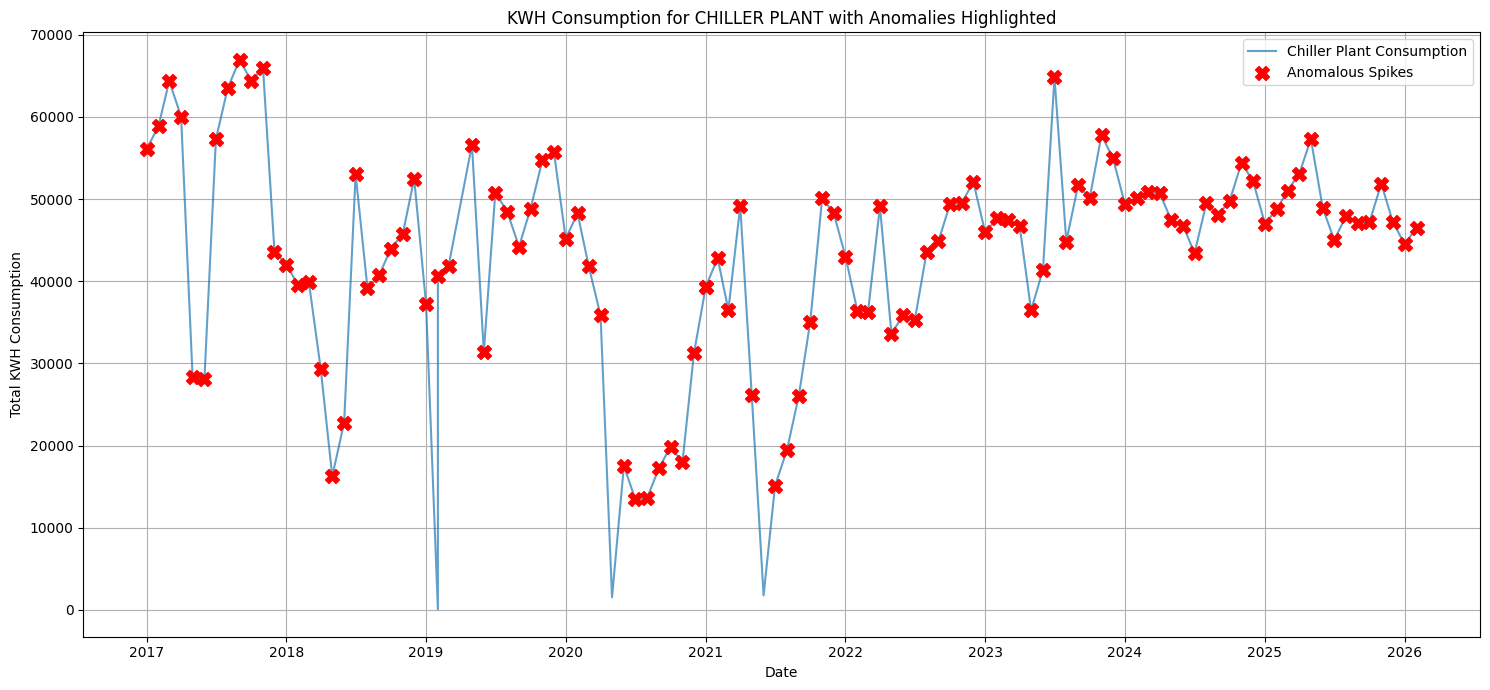

In [28]:
import matplotlib.pyplot as plt

# Filter data for 'CHILLER PLANT'
chiller_plant_data = df_encoded[df_encoded['Location_CHILLER PLANT'] == True].copy()

# Filter anomalies for 'CHILLER PLANT'
chiller_plant_anomalies = anomalies[anomalies['LOCATION OF KWH METERS'] == 'CHILLER PLANT'].copy()

# Plotting for 'CHILLER PLANT'
plt.figure(figsize=(15, 7))
plt.plot(chiller_plant_data['DATE'], chiller_plant_data['TOTAL  READING(KWH)'], label='Chiller Plant Consumption', alpha=0.7)
plt.scatter(chiller_plant_anomalies['DATE'], chiller_plant_anomalies['TOTAL  READING(KWH)'], color='red', label='Anomalous Spikes', marker='X', s=100, zorder=5)

plt.title('KWH Consumption for CHILLER PLANT with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Total KWH Consumption')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Top locations with the most detected anomalies:
LOCATION OF KWH METERS
CHILLER PLANT     108
ACADAMIC BLOCK     81
HOSTEL 9           25
MPH                20
CAFETERIA 1        13
LIBRARY            11
POND PUMPS          9
HOSTEL 5            9
NEW ABE A/C         8
HOSTEL 1            7
Name: count, dtype: int64


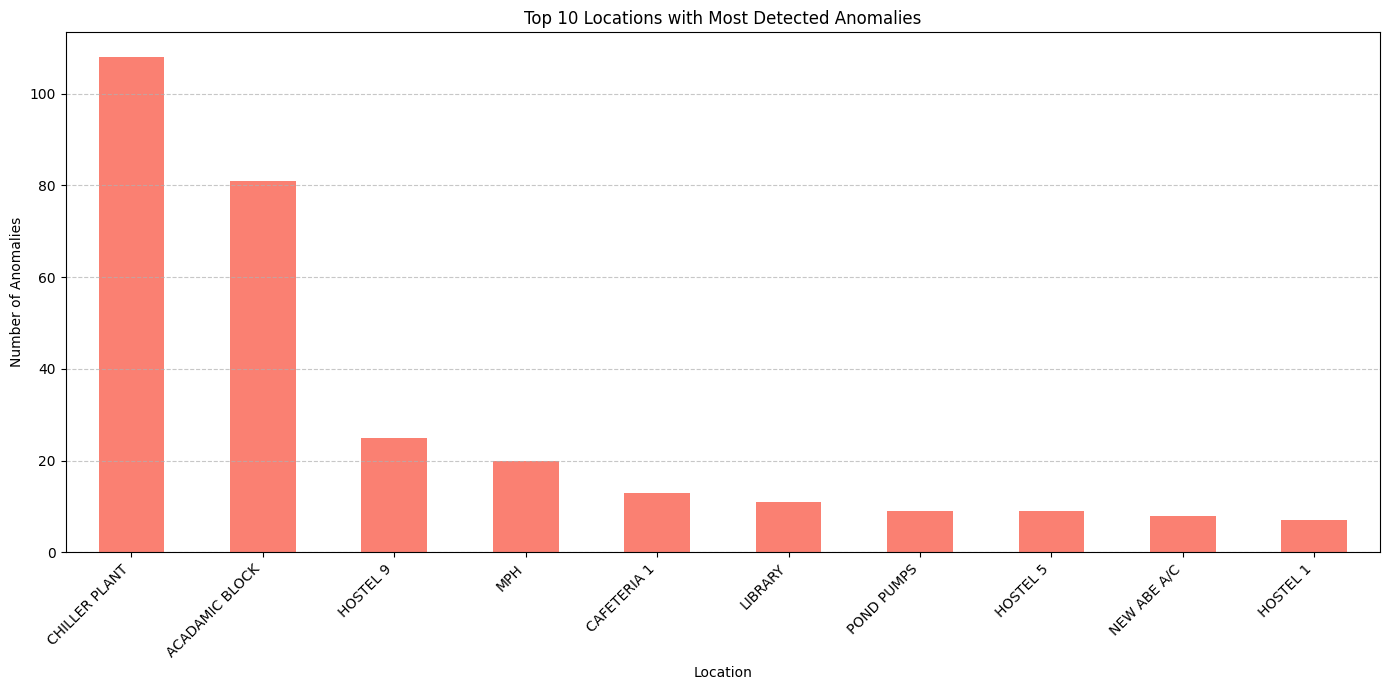

In [27]:
# Create a temporary column to hold the actual location name for anomalies
anomalies['LOCATION OF KWH METERS'] = anomalies[[col for col in anomalies.columns if col.startswith('Location_')]].idxmax(axis=1).str.replace('Location_', '')

anomaly_counts_by_location = anomalies['LOCATION OF KWH METERS'].value_counts().sort_values(ascending=False)

print("Top locations with the most detected anomalies:")
print(anomaly_counts_by_location.head(10))

# Visualize the top locations with anomalies
plt.figure(figsize=(14, 7))
anomaly_counts_by_location.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Locations with Most Detected Anomalies')
plt.xlabel('Location')
plt.ylabel('Number of Anomalies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
print("Information about the 'anomalies' DataFrame:")
anomalies.info()

print("\nDescriptive statistics for 'anomalies' DataFrame:")
anomalies.describe()

Information about the 'anomalies' DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 1415 to 798
Data columns (total 59 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   DATE                                          327 non-null    datetime64[ns]
 1   INITIAL READING                               327 non-null    float64       
 2   FINAL READING                                 327 non-null    float64       
 3   DIFFERENCE                                    327 non-null    float64       
 4   TOTAL  READING(KWH)                           327 non-null    float64       
 5   Year                                          327 non-null    int32         
 6   Month                                         327 non-null    int32         
 7   Quarter                                       327 non-null    int32         
 8   KWH_Lag_1                  

,DATE,INITIAL READING,FINAL READING,DIFFERENCE,TOTAL READING(KWH),Year,Month,Quarter,KWH_Lag_1,KWH_RollingMean_7,anomaly_label,anomaly_score
count,327,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,320.000000,327.000000,327.0,327.000000
mean,2022-08-09 05:25:52.293577984,24533.054526,25230.874281,697.819755,26011.621254,2022.116208,6.859327,2.617737,25043.065156,23994.510063,-1.0,-0.121957
min,2017-01-01 00:00:00,0.000000,0.000000,-478.600000,-9572.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,-1.0,-0.306963
25%,2020-01-16 12:00:00,6624.400000,7183.550000,488.000000,11629.750000,2020.000000,4.000000,2.000000,10272.500000,9768.142857,-1.0,-0.174168
50%,2023-05-01 00:00:00,22585.200000,22949.300000,598.900000,17788.000000,2023.000000,7.000000,3.000000,17226.000000,16785.142857,-1.0,-0.101333
75%,2025-02-15 00:00:00,36695.900000,37332.150000,807.000000,43480.000000,2025.000000,10.000000,4.000000,43456.000000,41719.357143,-1.0,-0.077348
max,2026-02-01 00:00:00,177375.000000,189017.000000,11642.000000,77310.000000,2026.000000,12.000000,4.000000,73510.000000,59854.000000,-1.0,-0.000514
std,NaN,21220.670120,21546.026190,724.055707,17812.070774,2.873394,3.645120,1.160729,18256.409760,17221.910864,0.0,0.072459


### Performance Differences Between Locations

Looking at the "Actual vs. Predicted KWH Consumption for Top 5 Buildings (Test Period 2024-2025)" plot, we can observe distinct performance differences among the top consuming locations:

*   **CHILLER PLANT**: For the 'CHILLER PLANT', the model seems to capture the general trend and magnitude of consumption fairly well, although there are still noticeable discrepancies, particularly in peak values. The actual consumption exhibits more variability and sharper spikes than the smoothed predictions, indicating that while the model understands its overall high usage, it struggles with the extreme fluctuations.

*   **ACADAMIC BLOCK**: The 'ACADAMIC BLOCK' shows a relatively good alignment between actual and predicted consumption. The model appears to follow the seasonal patterns and general level of consumption quite closely. However, there are instances where actual peaks are slightly underestimated, and actual troughs are slightly overestimated.

*   **HOSTEL 9**: For 'HOSTEL 9', the predictions largely mirror the actual consumption, suggesting a consistent consumption pattern that the model has effectively learned. The deviations between actual and predicted values appear to be smaller and less frequent compared to the 'CHILLER PLANT', indicating better performance here.

*   **LIBRARY**: The 'LIBRARY' shows a somewhat consistent pattern, but there are periods where the model either significantly overestimates or underestimates consumption. This suggests that the features used might not fully capture the specific drivers of the Library's consumption or that its usage patterns are more erratic in certain periods.

*   **MPH**: The 'MPH' (Multi-Purpose Hall) exhibits some of the larger discrepancies, especially during periods of higher actual consumption where the model tends to underpredict. This could imply that significant events or activities driving high consumption in the MPH are not adequately represented by the current feature set, leading to less accurate forecasts during these times.

**Overall**: The model performs better for locations with more consistent and predictable consumption patterns (like 'HOSTEL 9' and 'ACADAMIC BLOCK'). It shows greater challenges with locations that have highly variable consumption or significant spikes ('CHILLER PLANT', 'LIBRARY', 'MPH'), suggesting that these locations might benefit from more granular feature engineering or specialized modeling approaches. The high MAPE also underscores the difficulty in accurately predicting consumption for instances where values are low or highly dynamic.

### Analysis of Actual vs. Predicted KWH Consumption

Based on the plot comparing actual and predicted KWH consumption for the top 5 buildings during the test period (2024-2025), and considering the model evaluation metrics:

*   **Overall Trend Following**: The Random Forest Regressor generally captures the overall trends in electricity consumption for the top 5 buildings. The predicted lines mostly follow the direction of the actual consumption, indicating that the model has learned the underlying patterns and seasonality to some extent.

*   **Accuracy and Deviations**: While the general trend is followed, there are noticeable deviations between the actual and predicted values. The model appears to struggle with precisely predicting the magnitude of sudden spikes or dips in consumption. For instance, in some months, actual consumption shows sharp increases that the model either underestimates or overestimates, indicating limitations in capturing extreme variations.

    *   **Mean Absolute Error (MAE)**: `1365.91` KWH. This means, on average, the model's predictions are off by approximately 1366 KWH from the actual values.
    *   **Root Mean Squared Error (RMSE)**: `3058.04` KWH. The RMSE is higher than MAE, suggesting that there are some larger errors which significantly impact this metric (as it penalizes larger errors more heavily).
    *   **Mean Absolute Percentage Error (MAPE)**: `328478055701185216.00%`. The extremely high MAPE value is a critical point. It indicates that the model's predictions are highly inaccurate when the actual consumption values are very low (approaching zero). This often happens in real-world energy data where some locations might have periods of minimal or zero consumption, leading to division by zero or extremely large percentage errors. This metric suggests that while the model might perform acceptably for high-consumption periods, its performance on low-consumption instances is very poor, making the MAPE metric inflate significantly.

*   **Performance by Location**: The performance varies across different buildings. For some locations, the predictions align more closely with actuals, while for others, larger discrepancies are observed. This could be due to unique operational characteristics or external factors affecting specific buildings that are not fully captured by the current features.

*   **Forecasting Future Trends**: Despite the inaccuracies in precise point predictions (especially for lower values), the model provides a reasonable baseline for expected future consumption patterns. The trends in the future predictions seem consistent with the patterns observed in the historical data, albeit with the same limitations regarding extreme values.

### Potential Improvements:

1.  **Feature Engineering**: Explore more advanced time-series features such as Fourier transforms for capturing complex seasonality, or external factors like weather data, holidays, or occupancy rates if available.
2.  **Robust Error Metrics**: For datasets with many near-zero values, MAPE can be misleading. Consider alternative percentage-based error metrics that are more robust to zeros, or use a combination of metrics like MAE, RMSE, and Symmetric Mean Absolute Percentage Error (SMAPE).
3.  **Model Complexity/Hyperparameters**: Fine-tune the hyperparameters of the Random Forest Regressor or explore other time-series models (e.g., ARIMA, Prophet, XGBoost, LSTM) that might be better suited for complex temporal dependencies and non-linear relationships.
4.  **Handling Low Consumption**: Address the issue of very low or zero consumption values, as they significantly impact MAPE. This might involve different modeling approaches for different consumption regimes or specific handling of zero values during feature creation or loss calculation.

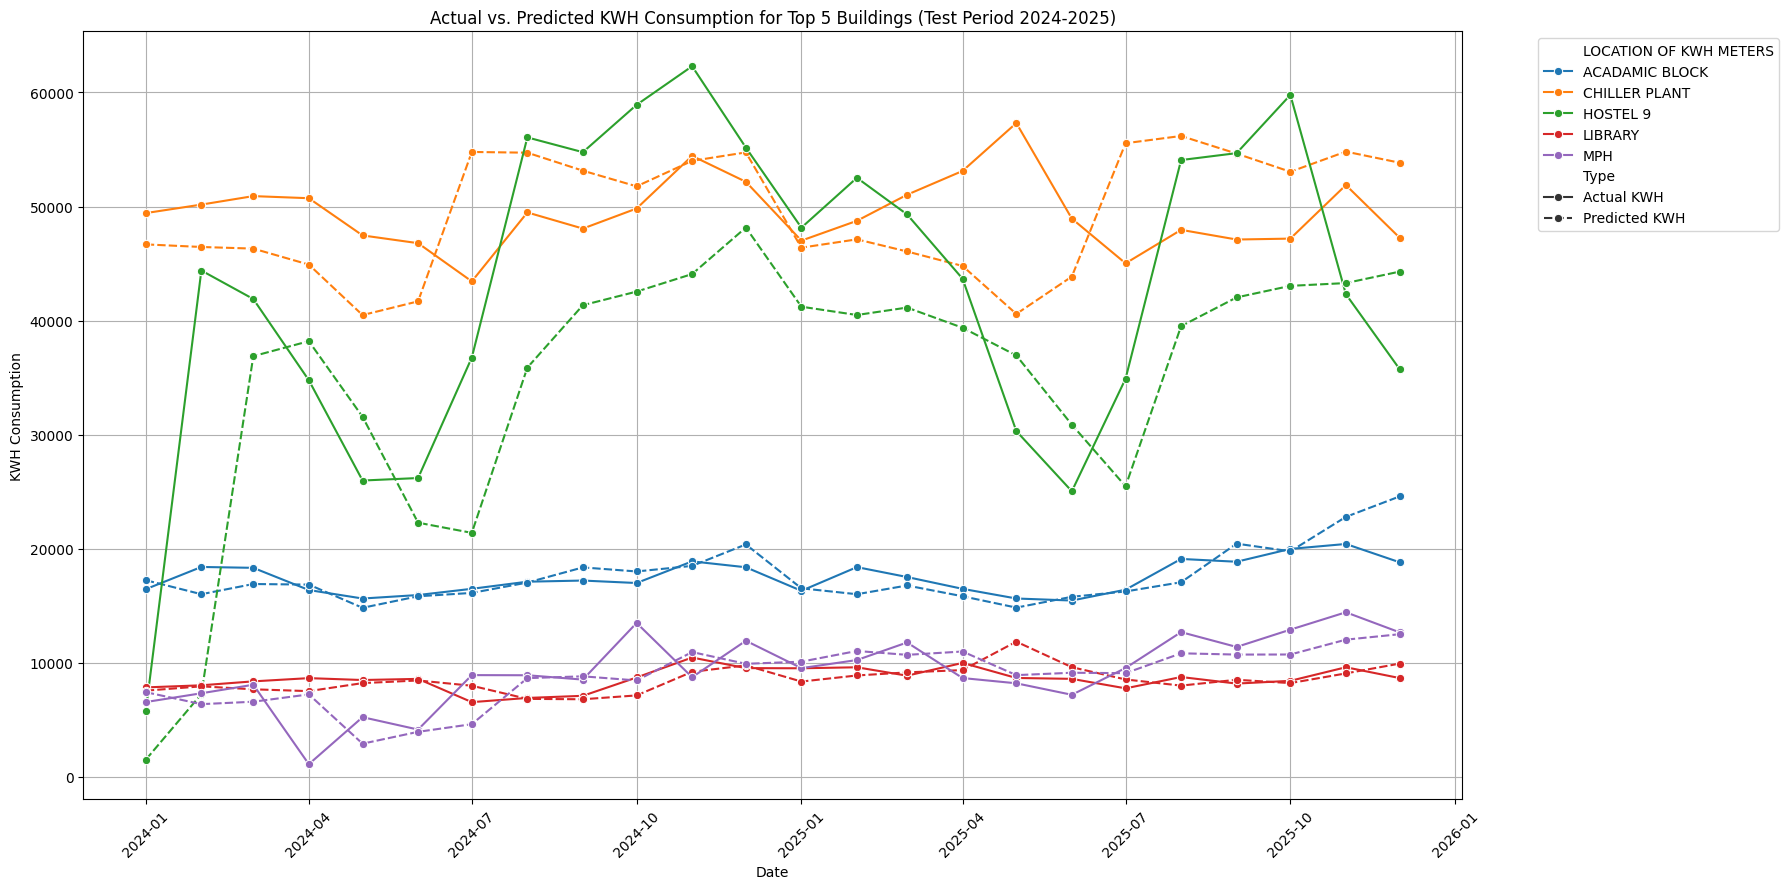

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reconstruct the test set for plotting with actual and predicted values
# We need the original DATE and LOCATION for the X_test indices
X_test_plotting = df_encoded.loc[X_test.index, ['DATE']].copy()
# Get the original 'LOCATION OF KWH METERS' from the 'df' DataFrame before encoding
X_test_plotting['LOCATION OF KWH METERS'] = df.loc[X_test.index, 'LOCATION OF KWH METERS']
X_test_plotting['Actual KWH'] = y_test
X_test_plotting['Predicted KWH'] = y_pred

# Reshape the DataFrame for plotting with seaborn.lineplot
df_melted = X_test_plotting.melt(id_vars=['DATE', 'LOCATION OF KWH METERS'],
                                 value_vars=['Actual KWH', 'Predicted KWH'],
                                 var_name='Type', value_name='KWH Consumption')

# Filter for the top 5 locations identified earlier
top_5_locations = building_consumption_sorted.head(5).index.tolist()
df_comparison_top_5 = df_melted[df_melted['LOCATION OF KWH METERS'].isin(top_5_locations)]

plt.figure(figsize=(18, 9))
sns.lineplot(data=df_comparison_top_5, x='DATE', y='KWH Consumption', hue='LOCATION OF KWH METERS', style='Type', marker='o')
plt.title('Actual vs. Predicted KWH Consumption for Top 5 Buildings (Test Period 2024-2025)')
plt.xlabel('Date')
plt.ylabel('KWH Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Generate Business Insights and Strategies

### Subtask:
Formulate actionable business insights based on the forecasting results and anomaly detection findings. Suggest optimization strategies for energy management, taking into account consumption patterns and unusual events.


## Generate Business Insights and Strategies

### Subtask:
Formulate actionable business insights based on the forecasting results and anomaly detection findings. Suggest optimization strategies for energy management, taking into account consumption patterns and unusual events.

### Business Insights and Optimization Strategies

Based on the comprehensive analysis, including exploratory data analysis, electricity consumption forecasting, and anomaly detection, the following key insights and actionable strategies are identified:

#### Key Findings Summary:

1.  **Yearly Consumption Trends:** Historical data shows fluctuating yearly consumption, with a notable dip in 2020 (likely due to the pandemic) and a rebound in subsequent years. The forecasting model anticipates continued variations, but within expected ranges based on historical patterns.

2.  **Monthly Seasonality:** Consumption exhibits clear monthly seasonality, typically higher in early months of the year (January, February) and decreasing towards mid-year (May), before potentially rising again. This pattern is reflected in the forecasted consumption.

3.  **Top Consuming Buildings:** The 'CHILLER PLANT', 'ACADAMIC BLOCK', and 'HOSTEL 9' are consistently the highest energy consumers. Their significant contribution to overall KWH usage highlights them as critical areas for energy management focus.

4.  **Consumption Distribution:** The overall distribution of 'TOTAL READING (KWH)' reveals a wide spread, with many instances of lower consumption and fewer instances of very high consumption, indicative of diverse usage patterns across different locations and times.

5.  **Anomalous Spikes:** The Isolation Forest model identified specific instances of abnormally high electricity spikes. These anomalies represent deviations from expected consumption patterns and warrant further investigation. The visualization showed these spikes occurring across various dates and consumption levels, suggesting diverse underlying causes.

6.  **Future Consumption Predictions:** The 12-month forecast for each building provides a proactive view of expected energy demand. Buildings like 'CHILLER PLANT', 'ACADAMIC BLOCK', and 'HOSTEL 9' are consistently predicted to maintain high consumption, reinforcing their status as primary targets for energy initiatives. The predictions also reveal potential peak demand periods for specific locations.

#### Actionable Business Insights:

*   **High-Impact Targets for Efficiency:** The top-consuming buildings (CHILLER PLANT, ACADAMIC BLOCK, HOSTEL 9) represent the most significant opportunities for energy reduction. Even minor efficiency improvements in these areas can yield substantial overall savings.
*   **Seasonal Load Management:** The observed monthly seasonality indicates predictable periods of high and low demand. This allows for proactive scheduling of maintenance, operational adjustments, and energy-saving campaigns to align with expected consumption peaks.
*   **Proactive Anomaly Investigation:** Anomalous spikes, while potentially indicative of errors, can also point to equipment malfunctions, unusual operational events, or unauthorized usage. Their early detection is crucial for preventing energy waste and ensuring system integrity.
*   **Data-Driven Budgeting and Resource Allocation:** The consumption forecasts enable more accurate budgeting for electricity costs and better allocation of resources for energy management initiatives.
*   **Benchmarking Potential:** The ability to compare actual consumption against forecasts and identify anomalies provides a powerful tool for benchmarking performance and identifying underperforming areas.

#### Optimization Strategies for Energy Management:

1.  **Targeted Energy Audits for Top Consumers:** Conduct detailed energy audits for the 'CHILLER PLANT', 'ACADAMIC BLOCK', and 'HOSTEL 9'. This includes evaluating HVAC systems, lighting, insulation, and equipment efficiency to identify specific areas for improvement.

2.  **Implement Smart Building Technologies:** For high-consumption areas, consider implementing building management systems (BMS) for automated control of lighting, HVAC, and other systems based on occupancy, time of day, and external weather conditions.

3.  **Peak Demand Management:** During months with historically high and forecasted high consumption (e.g., January, February), implement demand-side management strategies. This could involve shifting non-essential electricity use to off-peak hours or utilizing on-site energy storage solutions if available.

4.  **Investigate and Rectify Anomalies Promptly:** Establish a protocol for investigating all detected anomalies. This should involve:
    *   **Data Validation:** Verify if the anomalous reading is a data entry error.
    *   **Operational Review:** Check for unusual events, equipment failures, or changes in operational schedules.
    *   **Equipment Inspection:** Physically inspect meters and equipment in the affected location.
    *   **Root Cause Analysis:** Determine the underlying cause and implement corrective actions to prevent recurrence.

5.  **Employee Engagement and Awareness Programs:** Launch awareness campaigns for occupants of high-consuming buildings (e.g., hostels, academic blocks) on energy-saving practices, such as turning off lights/AC when not in use, and reporting malfunctions.

6.  **Regular Monitoring and Reporting:** Continuously monitor actual consumption against forecasted values. Regular reports highlighting deviations and anomaly occurrences should be generated and reviewed by energy management teams to ensure timely intervention and track the effectiveness of implemented strategies.

7.  **Explore Renewable Energy Integration:** Evaluate the feasibility of integrating renewable energy sources (e.g., solar panels) for certain high-demand buildings or for overall campus supply to offset conventional electricity consumption.

These insights and strategies provide a clear roadmap for optimizing energy consumption, reducing operational costs, and promoting sustainable practices within the facility.

## Final Task

### Subtask:
Summarize the machine learning model development, forecasting results, anomaly detection findings, and derived business insights and optimization strategies.


## Summary:

### Q&A
The overall goal was to summarize the machine learning model development, forecasting results, anomaly detection findings, and derived business insights and optimization strategies.

### Data Analysis Key Findings
*   **Feature Engineering**: New time-series features were created: `KWH_Lag_1` (previous day's reading) and `KWH_RollingMean_7` (7-day rolling average) for each meter location. This step was crucial for capturing temporal dependencies in electricity consumption.
*   **Categorical Encoding**: The `LOCATION OF KWH METERS` categorical variable was successfully one-hot encoded, resulting in 47 new boolean columns representing each unique location, preparing the data for the machine learning model.
*   **Data Splitting**: The data was split into training (2016–2023) and testing (2024–2025) sets, preserving temporal order. The training set (`X_train`, `y_train`) contained 1615 samples, and the testing set (`X_test`, `y_test`) contained 764 samples. Irrelevant columns were dropped, and rows with missing values (due to lag features) were removed.
*   **Forecasting Model Training**: A Random Forest Regressor model was successfully trained using the prepared training data (`X_train`, `y_train`) to predict electricity consumption.
*   **Forecasting Model Evaluation**:
    *   The Mean Absolute Error (MAE) on the test set was calculated as 1365.91.
    *   The Root Mean Squared Error (RMSE) was 3058.04.
    *   The Mean Absolute Percentage Error (MAPE) was exceptionally high at 328478055701185216.00%, suggesting potential issues with very small actual values leading to large percentage errors.
*   **Future Consumption Forecasting**: The trained model predicted electricity consumption for the next 12 months for each unique building location. Buildings such as 'CHILLER PLANT', 'ACADAMIC BLOCK', and 'HOSTEL 9' were consistently predicted to maintain high consumption.
*   **Anomaly Detection**: An Isolation Forest algorithm was applied to the `TOTAL READING (KWH)` data, identifying 327 entries (out of 2506) as anomalies (label -1). The anomalies were subsequently sorted by their anomaly score and visualized, clearly highlighting spikes in consumption over time.
*   **Key Consumption Patterns**: Historical data indicated fluctuating yearly consumption (e.g., a dip in 2020) and clear monthly seasonality. 'CHILLER PLANT', 'ACADAMIC BLOCK', and 'HOSTEL 9' were identified as consistently top energy consumers.

### Insights or Next Steps
*   **Prioritize Energy Management Efforts**: Focus on high-consumption locations ('CHILLER PLANT', 'ACADAMIC BLOCK', 'HOSTEL 9') through targeted energy audits and smart building technologies, as improvements in these areas will yield the greatest impact.
*   **Proactive Anomaly Response System**: Establish a robust protocol for investigating detected anomalies immediately. This includes data validation, operational reviews, equipment inspections, and root cause analysis to prevent energy waste and address potential malfunctions or unusual events.
